In [69]:
import numpy as np
import matplotlib.pyplot as mp
from pylab import show
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR

from sklearn.preprocessing import PolynomialFeatures

dataC = pd.read_csv("time_series_covid19_confirmed_global_iso3_regions.csv")
dataR = pd.read_csv("time_series_covid19_recovered_global_iso3_regions.csv")
dataD = pd.read_csv("time_series_covid19_deaths_global_iso3_regions.csv")

USC = dataC.loc[dataC['Country/Region'] == 'US']
USR = dataR.loc[dataR['Country/Region'] == 'US']
USD = dataD.loc[dataD['Country/Region'] == 'US']

USC = USC.values.tolist()
USC_data = [0.0]

USR = USR.values.tolist()
USR_data = [0.0]

USD = USD.values.tolist()
USD_data = [0.0]

for i in USC[0]:
    if isinstance(i, float) and np.isnan(i) == False:
        USC_data.append(i)
        
for i in USR[0]:
    if isinstance(i, float) and np.isnan(i) == False:
        USR_data.append(i)
        
for i in USD[0]:
    if isinstance(i, float) and np.isnan(i) == False:
        USD_data.append(i)
 
xAxis = []
for i in range(len(USC_data)):
    xAxis.append(i)
    

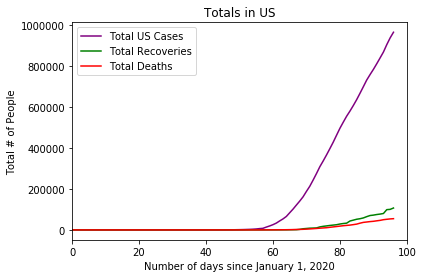

In [380]:
mp.plot(xAxis, USC_data, c='purple',label='Total US Cases')

mp.plot(xAxis, USR_data, c='green',label='Total Recoveries')

mp.plot(xAxis, USD_data, c='red', label='Total Deaths')
mp.xlim(0, 100)

mp.legend()
mp.ylabel('Total # of People')
mp.xlabel("Number of days since January 1, 2020")
mp.title('Totals in US')

mp.show()

After pulling several different catagories from the data we can look at the most important pieces from the dataset. The number of cases in the US, and really all over the world, is alarming. When it comes to just looking at the US data though it's important to note that although testing has ramped up since the middle of March, it really needs to increase more so we can actually see how fast this virus is spreading.

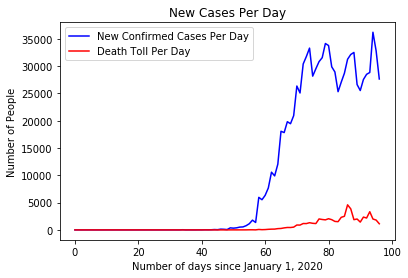

In [392]:
percentDoC = []

for i in range(len(xAxis)):
    if USC_data[i] == 0:
        percentDoC.append(0.0)
    else:
        percentDoC.append(100*(USD_data[i]/USC_data[i]))
      

newConfirmed = []
deathToll = []

for i in range(len(xAxis)):
    if i == 0:
        deathToll.append(0)
        newConfirmed.append(0)
    else:
        newConfirmed.append(USC_data[i]-USC_data[i-1])
        deathToll.append(USD_data[i]-USD_data[i-1])
        
mp.plot(xAxis, newConfirmed, color='blue', label="New Confirmed Cases Per Day")
mp.plot(xAxis,deathToll, color='red', label="Death Toll Per Day")
mp.legend()
mp.ylabel('Number of People')
mp.xlabel("Number of days since January 1, 2020")
mp.title("New Cases Per Day")

mp.show()


Now that we have all the data that we want to look at the new data that comes in every day. We can see that the number of new cases as well as the number of new deaths has been roughly the same for the last 30 days. I think that the number of cases has begun to level out because of the mitigation, wearing masks and stay at home orders, has been keeping the cases more or less under control. The scary thing here in my opinion is that the cases per day hasn't gone down on average over the last month even with the mitigation. I also believe that with more testing we would likely see much bigger numbers.

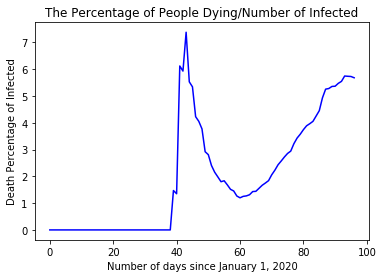

In [400]:
mp.plot(xAxis, percentDoC, color='blue')

mp.ylabel('Death Percentage of Infected')
mp.xlabel("Number of days since January 1, 2020")
mp.title("The Percentage of People Dying/Number of Infected")

mp.show()

This is also a very important statistic to look at. It is the mortality rate after being infected. The spike early on, to more the 7%, is likely because this was before we ramped testing up and the confirmed cases was still very low. This mortality rate is possibly lower than it is shown here because there are likely a large number of undiagnosed/unconfirmed cases.

In [430]:
allModels = [] #A list that will store all the models with different degrees
allPolyFe = []
allYPreds = [] #A list that will store all of the prediction values for each model

#Create and store all Regression models with different polynomial degrees
for i in range(10):
    model = LR(fit_intercept=False,n_jobs=100)
    poly = PolynomialFeatures(degree=i+2, include_bias=False)

    trainX, testX, trainY, testY = train_test_split(xAxis, USC_data, test_size=.10, random_state=0, shuffle=False)
    newTrainX = poly.fit_transform(np.array(trainX).reshape(-1,1))
    newTestX = poly.fit_transform(np.array(testX).reshape(-1,1))
    
    model.fit(newTrainX, trainY) #Polynomial Regression
    scores.append(model.score(newTestX, testY))
    
    allPolyFe.append(poly)
    allModels.append(model) #Store Model
    
#Create a list 0 to 200 that will represent the 200 days from January 1st to 200 days later
days = [] 
for i in range(200):
    days.append(i)

#Have each model predict the 200 days and than store all the predictions
for i in range(len(allModels)):
    predDays = allPolyFe[i].fit_transform(np.array(days).reshape(-1,1))
    yPred = allModels[i].predict(predDays)
    allYPreds.append(yPred)

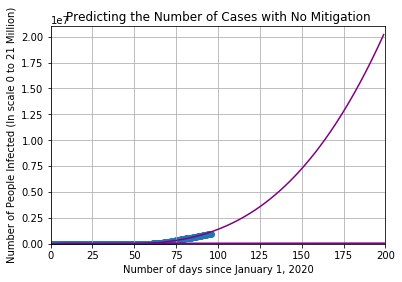

In [431]:
mp.scatter(xAxis,USC_data, label='Total Confirmed Cases')
mp.plot(predDays, allYPreds[1], color='purple', label='Best Fit Curve')

mp.xlim(0,200)
mp.ylim(0,21000000)
mp.ylabel('Number of People Infected (In scale 0 to 21 Million)')
mp.xlabel("Number of days since January 1, 2020")
mp.title('Predicting the Number of Cases with No Mitigation')
mp.grid()

mp.show()

The graph above shows a prediction of the number of people to be infected over the next 100 days. If we let up on our mitigation strategies in the near future this is very possible. I would imagine that because we haven't been testing as much as we would need to to see numbers like this the graph in reality will never look like this in the US, and I don't think that the mitigation will let up for the foreseeable future. Although the likelihood of this happening is low I do think it is a good visual for how bad this pandemic could get in the future.

In [432]:
allModels = [] #A list that will store all the models with different degrees
allPolyFe = []
allYPreds = [] #A list that will store all of the prediction values for each model

#Create and store all Regression models with different polynomial degrees
for i in range(10):
    model = LR(fit_intercept=False,n_jobs=5)
    poly = PolynomialFeatures(degree=i+2, include_bias=False)

    trainX, testX, trainY, testY = train_test_split(xAxis, USD_data, test_size=.10, random_state=0, shuffle=False)
    newTrainX = poly.fit_transform(np.array(trainX).reshape(-1,1))
    newTestX = poly.fit_transform(np.array(testX).reshape(-1,1))
    
    model.fit(newTrainX, trainY) #Polynomial Regression
    scores.append(model.score(newTestX, testY))
    
    allPolyFe.append(poly)
    allModels.append(model) #Store Model
    
#Create a list 0 to 200 that will represent the 200 days from January 1st to 200 days later
days = [] 
for i in range(200):
    days.append(i)

#Have each model predict the 200 days and than store all the predictions
for i in range(len(allModels)):
    predDays = allPolyFe[i].fit_transform(np.array(days).reshape(-1,1))
    yPred = allModels[i].predict(predDays)
    allYPreds.append(yPred)


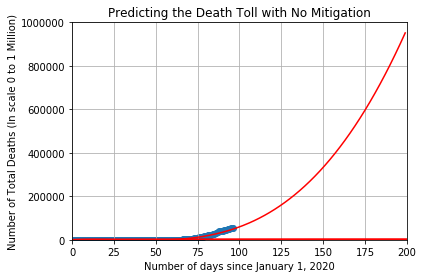

In [433]:
mp.scatter(xAxis,USD_data, label='Total Confirmed Cases')
mp.plot(predDays, allYPreds[1], color='red', label='Best Fit Curve')

mp.xlim(0,200)
mp.ylim(0,1000000)
mp.ylabel('Number of Total Deaths (In scale 0 to 1 Million)')
mp.xlabel("Number of days since January 1, 2020")
mp.title('Predicting the Death Toll with No Mitigation')
mp.grid()

mp.show()

With the last graph showing that there could potentially be 21 million people in the US becoming infected let's look at the number of people our model is predicting to die from it. It's showing just under 1 million people dying from this virus. That would be roughly a 5% mortality to the virus, which is pretty alarming since it spreads so easily. Close to 1 million people is horrible so this is why it is important to keep the number of infected as low as possible by wearing masks, social distancing and self quarantining. 

In [434]:
allModels = [] #A list that will store all the models with different degrees
allPolyFe = []
allYPreds = [] #A list that will store all of the prediction values for each model

#Create and store all Regression models with different polynomial degrees
for i in range(10):
    model = LR(fit_intercept=False,n_jobs=100)
    poly = PolynomialFeatures(degree=i+2, include_bias=False)

    trainX, testX, trainY, testY = train_test_split(xAxis, USR_data, test_size=.10, random_state=0, shuffle=False)
    newTrainX = poly.fit_transform(np.array(trainX).reshape(-1,1))
    newTestX = poly.fit_transform(np.array(testX).reshape(-1,1))
    
    model.fit(newTrainX, trainY) #Polynomial Regression
    scores.append(model.score(newTestX, testY))
    
    allPolyFe.append(poly)
    allModels.append(model) #Store Model
    
#Create a list 0 to 200 that will represent the 200 days from January 1st to 200 days later
days = [] 
for i in range(200):
    days.append(i)

#Have each model predict the 200 days and than store all the predictions
for i in range(len(allModels)):
    predDays = allPolyFe[i].fit_transform(np.array(days).reshape(-1,1))
    yPred = allModels[i].predict(predDays)
    allYPreds.append(yPred)

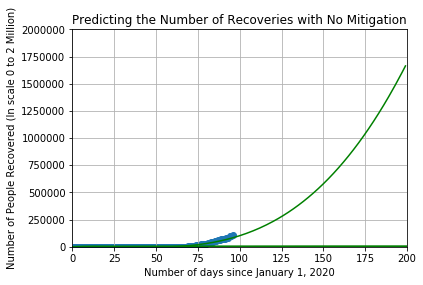

In [435]:
mp.scatter(xAxis,USR_data, label='Total Confirmed Cases')
mp.plot(predDays, allYPreds[1], color='green', label='Best Fit Curve')

mp.xlim(0,200)
mp.ylim(0,2000000)
mp.ylabel('Number of People Recovered (In scale 0 to 2 Million)')
mp.xlabel("Number of days since January 1, 2020")
mp.title('Predicting the Number of Recoveries with No Mitigation')
mp.grid()

mp.show()

This shows approximately 1.75 million people recovering. Now this will certainly be higher in actuality, because if this were true than there would still be about 80% of the people infected that are unaccounted for. Currently this data shows about 60% of the confirmed population unaccounted for, so this means there is about 60% of the total number of people infected that are still being monitored after they were confirmed. It is nice to know though that the number of people getting better is roughly twice as much as the number of people dying from the virus.

The models above were chosen by trying several variation and picking the one that most accurately followed the curve of the data. After trying to use cross validation and the accuracy method for the model the numbers were fairly inconclusive so we decided to use trial and error and our graph all of the model choices to see which one we though looked best.